In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
usdt_ticker = yf.Ticker("USDT-USD")
csv_file = "usdt.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Tether (USDT)
usdt = usdt_ticker.history(period="max")
usdt.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
usdt = pd.read_csv(csv_file, index_col=0)
usdt

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.0,0.0
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.0,0.0
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.0,0.0
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.0,0.0
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.0,0.0
2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.0,0.0
2024-06-17 00:00:00+00:00,0.999341,1.000182,0.999004,0.999645,60712949361,0.0,0.0


<Axes: xlabel='Date'>

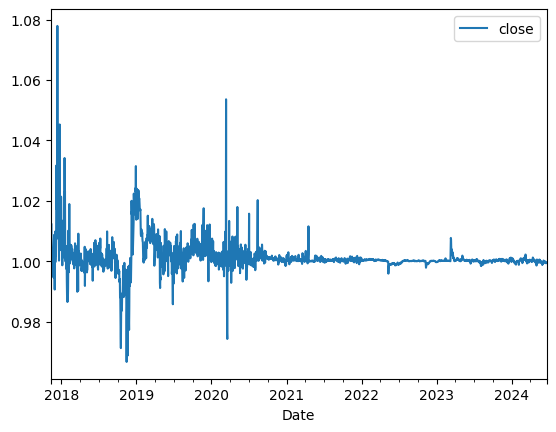

In [3]:
# Convert index to datetime
usdt.index = pd.to_datetime(usdt.index)

# Remove unnecessary columns
del usdt["Dividends"]
del usdt["Stock Splits"]

# Convert column names to lowercase
usdt.columns = [c.lower() for c in usdt.columns]

# Plot the closing price
usdt.plot.line(y="close", use_index=True)

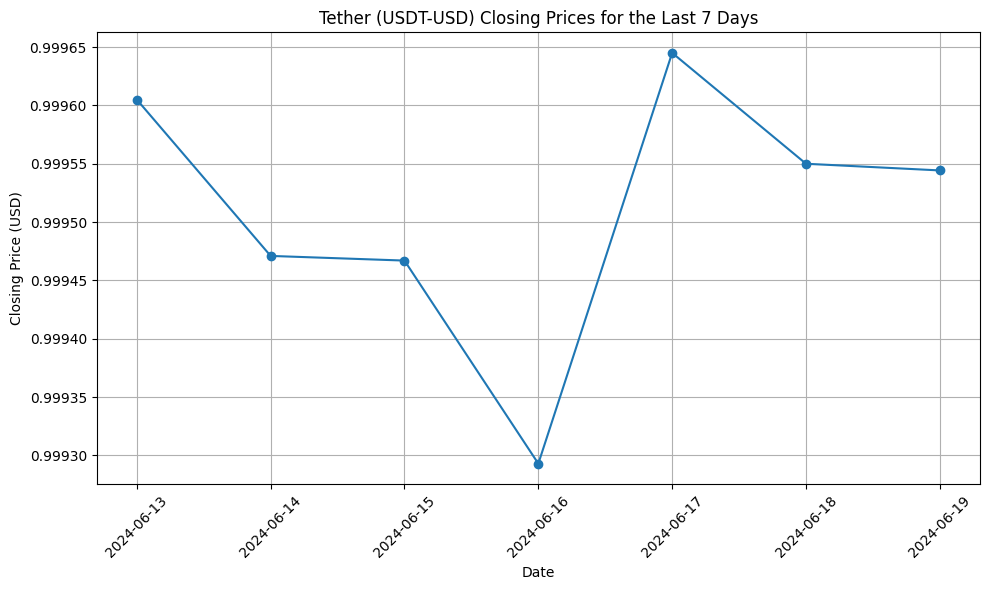

In [4]:
# Filter the data for the last seven days
last_seven_days_usdt = usdt[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_usdt.index, last_seven_days_usdt['close'], marker='o')
plt.title('Tether (USDT-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("tether_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.000000,0.000000,0.000000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.300000,-0.056709,0.080556
2024-06-16,0.333333,-0.089898,0.113889
2024-06-17,0.333333,-0.089898,0.113889
2024-06-18,0.333333,-0.089898,0.113889


In [6]:
# Assuming 'usdt' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
usdt = usdt.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
usdt["tomorrow"] = usdt["close"].shift(-1)
usdt["target"] = (usdt["tomorrow"] > usdt["close"]).astype(int)
usdt["target"].value_counts()


target
0    1239
1    1176
Name: count, dtype: int64

In [7]:
usdt

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.000000,0.000000,0.000000,1.006010,0
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.000000,0.000000,0.000000,1.008990,1
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.000000,0.000000,0.000000,1.012470,1
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.000000,0.000000,0.000000,1.009350,0
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.000000,0.000000,0.000000,1.006830,0
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.300000,-0.056709,0.080556,0.999293,0
2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.333333,-0.089898,0.113889,0.999645,1
2024-06-17 00:00:00+00:00,0.999341,1.000182,0.999004,0.999645,60712949361,0.333333,-0.089898,0.113889,0.999550,0
2024-06-18 00:00:00+00:00,0.999650,1.001334,0.999308,0.999550,78695656625,0.333333,-0.089898,0.113889,0.999544,0


In [8]:
usdt.to_csv('usdtSentiment.csv')

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = usdt.iloc[:-200]
test = usdt.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [10]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5538461538461539

In [11]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [12]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [13]:
preds

2023-12-03 00:00:00+00:00    0
2023-12-04 00:00:00+00:00    1
2023-12-05 00:00:00+00:00    0
2023-12-06 00:00:00+00:00    1
2023-12-07 00:00:00+00:00    0
                            ..
2024-06-15 00:00:00+00:00    1
2024-06-16 00:00:00+00:00    1
2024-06-17 00:00:00+00:00    1
2024-06-18 00:00:00+00:00    1
2024-06-19 00:00:00+00:00    1
Length: 200, dtype: int32

In [14]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(usdt, model, predictors)

In [15]:
predictions["predictions"].value_counts()


predictions
1    892
0    428
Name: count, dtype: int64

In [16]:
precision_score(predictions["target"], predictions["predictions"])

0.5482062780269058

In [17]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [18]:
usdt, new_predictors = compute_rolling(usdt.copy())
usdt

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.000000,0.000000,0.000000,1.006010,0,...,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.000000,0.000000,0.000000,1.008990,1,...,0.0,0.998923,0.000000,0.000000,0.998923,0.000000,0.000000,0.998923,0.000000,0.000000
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.000000,0.000000,0.000000,1.012470,1,...,0.5,1.001254,0.000000,0.500000,1.001254,0.000000,0.500000,1.001254,0.000000,0.500000
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.000000,0.000000,0.000000,1.009350,0,...,1.0,1.003526,0.000000,0.666667,1.003526,0.000000,0.666667,1.003526,0.000000,0.666667
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.000000,0.000000,0.000000,1.006830,0,...,0.5,1.000347,0.000000,0.500000,1.000347,0.000000,0.500000,1.000347,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.300000,-0.056709,0.080556,0.999293,0,...,0.0,0.999803,0.295238,0.142857,0.999672,0.300000,0.400000,0.999409,0.293425,0.471233
2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.333333,-0.089898,0.113889,0.999645,1,...,0.0,0.999716,0.304762,0.142857,0.999510,0.303333,0.400000,0.999236,0.293333,0.468493
2024-06-17 00:00:00+00:00,0.999341,1.000182,0.999004,0.999645,60712949361,0.333333,-0.089898,0.113889,0.999550,0,...,0.5,1.000059,0.314286,0.285714,0.999877,0.306667,0.400000,0.999588,0.293242,0.468493
2024-06-18 00:00:00+00:00,0.999650,1.001334,0.999308,0.999550,78695656625,0.333333,-0.089898,0.113889,0.999544,0,...,0.5,1.000020,0.323810,0.142857,0.999799,0.306667,0.383333,0.999494,0.293151,0.465753


In [19]:
predictions = backtest(usdt, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5725938009787929

In [20]:
prob_inc = (predictions["predictions"] == 1).mean()
prob_dec = 1 - prob_inc
print(f"Probability of increase: {prob_inc:.4f}")
print(f"Probability of decrease: {prob_dec:.4f}")

Probability of increase: 0.4644
Probability of decrease: 0.5356


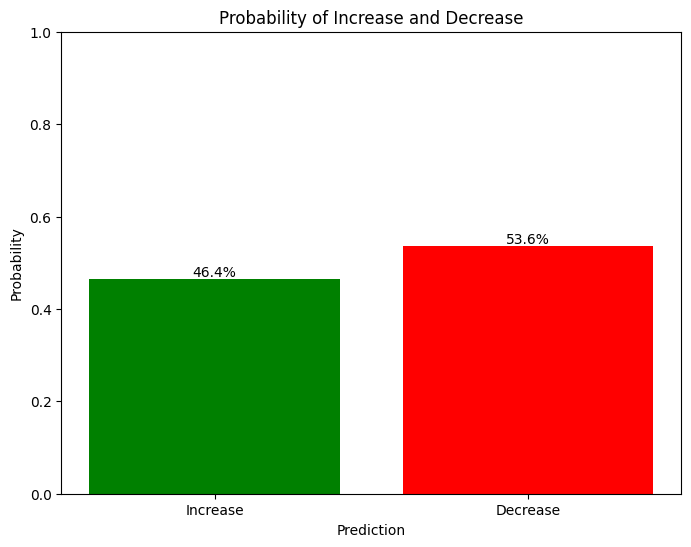

In [21]:
import matplotlib.pyplot as plt

prob_inc_pct = prob_inc * 100
prob_dec_pct = prob_dec * 100

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(["Increase", "Decrease"], [prob_inc, prob_dec], color=['green', 'red'])
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title('Probability of Increase and Decrease')

# Display percentages on top of bars
for bar, pct in zip(bars, [prob_inc_pct, prob_dec_pct]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()